In [1]:
import json
import pathlib
import logging

import pandas as pd

import llm_moral_values as llmv


logging.getLogger().setLevel(logging.INFO)

In [2]:
MODEL_ORDER = [
    "gemma:7b",
    "gemma2:27b",
    "qwen:72b",
    "qwen2:72b",
    "llama3.1:8b",
    "llama2:70b",
    "llama3:70b",
    "llama3.1:70b",
    "mistral:7b",
    "mixtral:8x7b",
    "mixtral:8x22b",
    "phi3:14b",
]
PERSONA_ORDER = ["base", "liberal", "moderate", "conservative"]

In [3]:
llmv.pipelines.ConductSurvey(
    iterations=50,
    models=[
        llmv.schemas.Model(id=model)
        for model in [
            "gemma:7b-instruct-q6_K",
            "llama2:70b-chat-q6_K",
            "llama3:70b-instruct-q6_K",
            "mistral:7b-instruct-v0.2-q6_K",
            "mixtral:8x22b-instruct-v0.1-q6_K",
            "mixtral:8x7b-instruct-v0.1-q6_K",
            "qwen:72b-chat-v1.5-q6_K",
            # new additions
            "gemma2:27b-instruct-q6_K",
            "llama3.1:8b-instruct-q6_K",
            "llama3.1:70b-instruct-q6_K",
            "qwen2:72b-instruct-q6_K",
            "phi3:14b-medium-128k-instruct-q6_K",
        ]
    ],
    survey=llmv.questionnaire.Survey(path="../../data/survey/moral_foundations"),
    personas=[
        llmv.schemas.Persona.model_validate_json(open(path, "r").read())
        for path in list(pathlib.Path("../../data/personas/").iterdir())
    ],
    export_path=pathlib.Path("./data/"),
)()

INFO:root:> Conducting Survey
INFO:root:Generated 50 surveys for configuration: gemma-7b:conservative
INFO:root:Generated 50 surveys for configuration: gemma-7b:base
INFO:root:Generated 50 surveys for configuration: gemma-7b:moderate
INFO:root:Generated 50 surveys for configuration: gemma-7b:liberal
INFO:root:Generated 50 surveys for configuration: llama2-70b:conservative
INFO:root:Generated 50 surveys for configuration: llama2-70b:base
INFO:root:Generated 50 surveys for configuration: llama2-70b:moderate
INFO:root:Generated 50 surveys for configuration: llama2-70b:liberal
INFO:root:Generated 50 surveys for configuration: llama3-70b:conservative
INFO:root:Generated 50 surveys for configuration: llama3-70b:base
INFO:root:Generated 50 surveys for configuration: llama3-70b:moderate
INFO:root:Generated 50 surveys for configuration: llama3-70b:liberal
INFO:root:Generated 50 surveys for configuration: mistral-7b:conservative
INFO:root:Generated 50 surveys for configuration: mistral-7b:base
I

In [4]:
dataset: llmv.data.Survey = llmv.data.Survey(data=pd.read_parquet("./data/survey.parquet"))
dataset.data

response dimension
segment   id model      persona                     
agreement 1  gemma2:27b base           4.0      harm
                        base           4.0      harm
                        base           4.0      harm
                        base           4.0      harm
                        base           4.0      harm
...                                    ...       ...
relevance 16 qwen:72b   moderate       5.0    purity
                        moderate       5.0    purity
                        moderate       0.0    purity
                        moderate       0.0    purity
                        moderate       5.0    purity

[76412 rows x 2 columns]

In [5]:
(dataset.data.groupby(["model", "persona", "dimension"], observed=True).mean().squeeze(axis=1))

model       persona   dimension
gemma2:27b  base      authority    2.783333
                      catch        2.500000
                      fairness     4.336667
                      harm         4.270000
                      ingroup      3.230000
                                     ...   
qwen:72b    moderate  catch        2.500000
                      fairness     4.323333
                      harm         4.550000
                      ingroup      3.498258
                      purity       3.200669
Name: response, Length: 288, dtype: float64

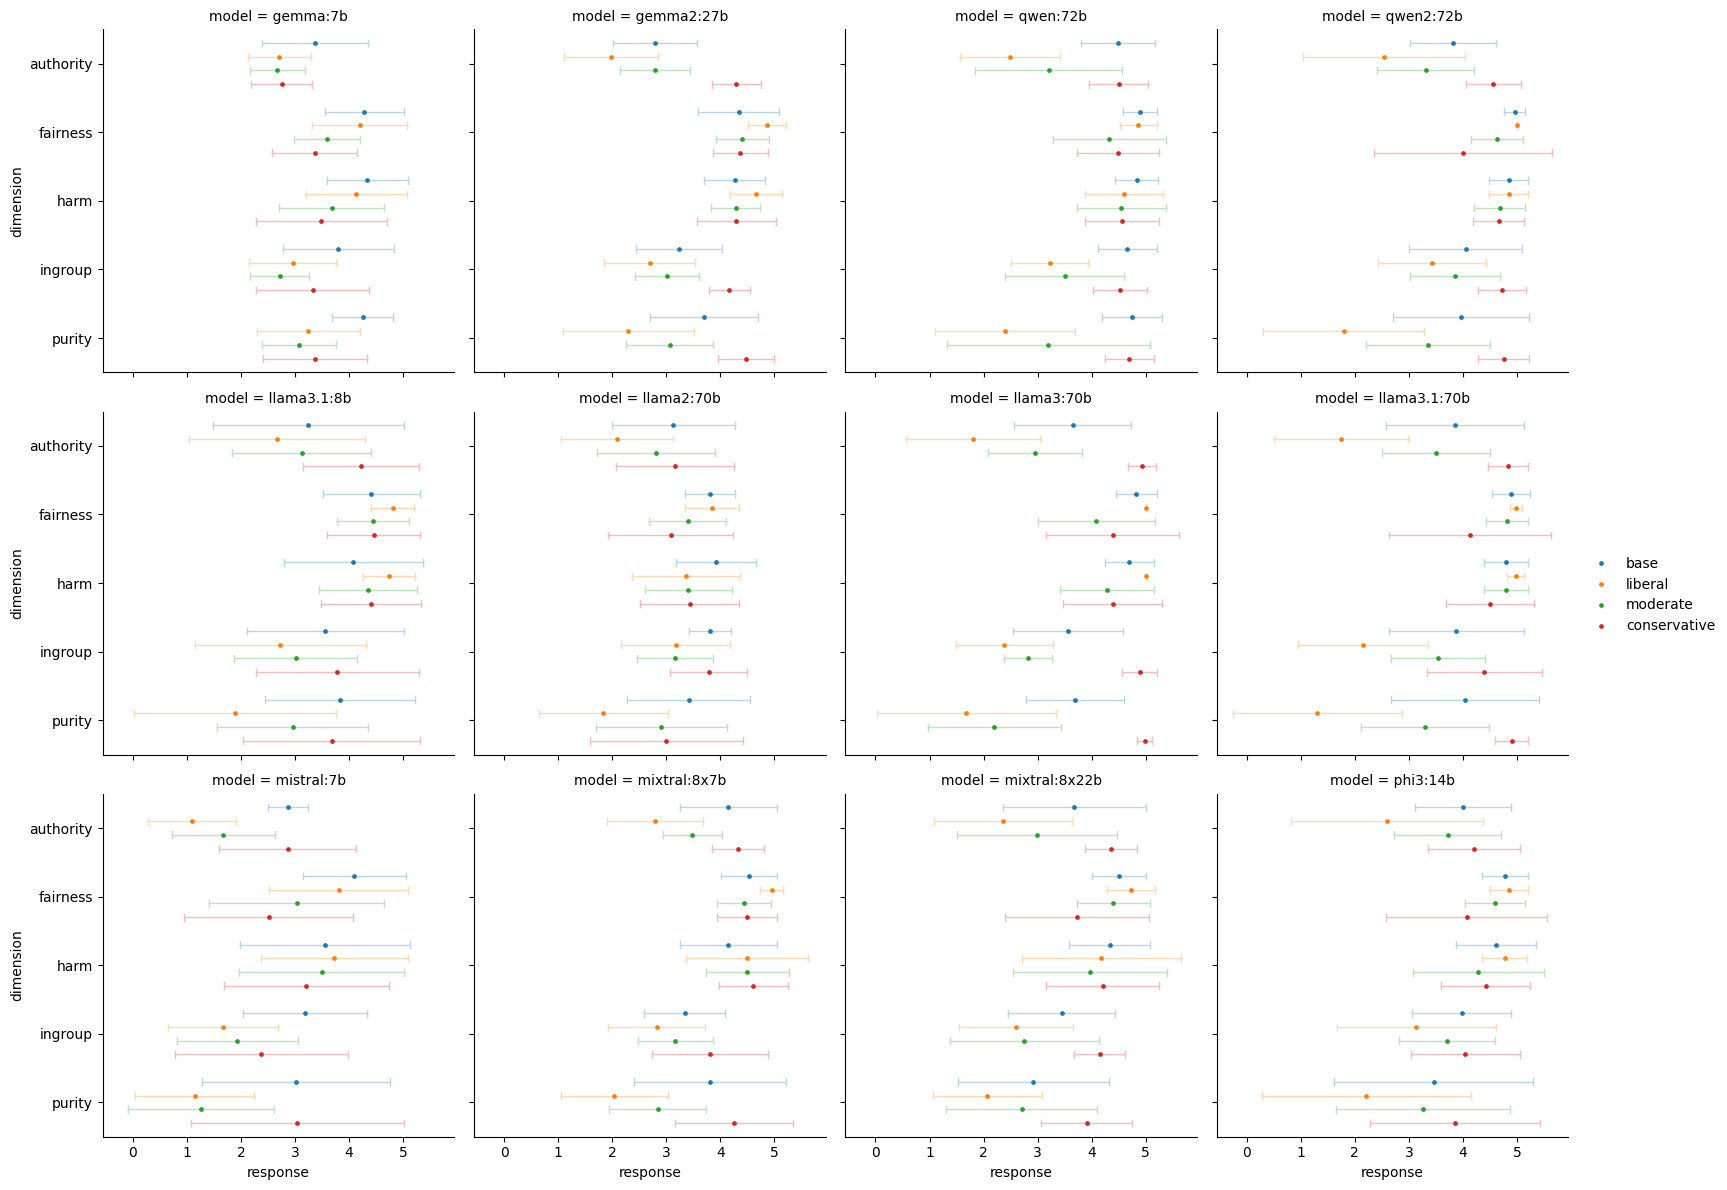

In [6]:
dataset.plot(
    "./report/points.by.model_persona_dimension.pdf",
    model_order=MODEL_ORDER,
    persona_order=PERSONA_ORDER,
)

In [7]:
cross_evaluation: llmv.data.CrossEvaluation = llmv.data.CrossEvaluation(
    data=pd.read_parquet("./data/cross_evaluation.parquet")
)
cross_evaluation.data

sample                     anonymous                               us  \
group                        liberal  moderate conservative   liberal   
model         persona                                                   
gemma2:27b    base          0.567333  0.318667     0.434667  1.162000   
              liberal       0.285333  0.679333     1.003333  0.796000   
              moderate      0.409333  0.162000     0.458000  1.009333   
              conservative  1.220000  0.970000     0.966000  1.820000   
gemma:7b      base          0.936181  0.657966     0.653966  1.507966   
              liberal       0.456446  0.152855     0.377554  0.948778   
              moderate      0.579075  0.235089     0.280779  0.710696   
              conservative  0.858599  0.368599     0.177376  0.958599   
llama2:70b    base          0.863333  0.353333     0.261333  1.115333   
              liberal       0.507333  0.557333     0.590667  0.452667   
              moderate      0.754000  0.280000     0.232000  0.854000   
              conservative  1.027450  0.517450     0.353450  1.127450   
llama3.1:70b  base          1.192000  0.942000     0.938000  1.792000   
              liberal       0.610667  1.120667     1.444667  0.596000   
              moderate      0.892000  0.642000     0.676667  1.492000   
              conservative  1.540000  1.202000     1.198000  2.052000   
llama3.1:8b   base          0.795333  0.477333     0.473333  1.327333   
              liberal       0.389333  0.622000     0.946000  0.864000   
              moderate      0.475333  0.244000     0.444000  1.075333   
              conservative  1.008000  0.758000     0.754000  1.608000   
llama3:70b    base          0.984000  0.734000     0.730000  1.584000   
              liberal       0.488000  0.998000     1.322000  0.713333   
              moderate      0.276000  0.310000     0.574000  0.769333   
              conservative  1.614667  1.364667     1.360667  2.214667   
mistral:7b    base          0.621301  0.171301     0.236699  0.861301   
              liberal       0.813521  1.063521     1.220488  0.286488   
              moderate      0.823268  1.073268     1.077268  0.248458   
              conservative  0.900562  0.590562     0.553727  0.951246   
mixtral:8x22b base          0.677781  0.461114     0.617114  1.277781   
              liberal       0.170000  0.544000     0.868000  0.687333   
              moderate      0.378667  0.243333     0.475333  0.864000   
              conservative  1.237333  0.808667     0.714000  1.578667   
mixtral:8x7b  base          0.933228  0.642487     0.638487  1.492487   
              liberal       0.384382  0.528096     0.852096  0.920382   
              moderate      0.582667  0.398000     0.554000  1.182667   
              conservative  1.199324  0.949324     0.945324  1.799324   
phi3:14b      base          1.066002  0.816002     0.812002  1.666002   
              liberal       0.414667  0.559333     0.835333  1.014667   
              moderate      0.812000  0.562000     0.614000  1.412000   
              conservative  1.131862  0.768618     0.764618  1.618618   
qwen2:72b     base          1.226667  0.976667     0.972667  1.826667   
              liberal       0.582667  0.759333     1.035333  1.020000   
              moderate      0.863333  0.613333     0.630667  1.463333   
              conservative  1.581333  1.192667     1.188667  2.042667   
qwen:72b      base          1.621333  1.371333     1.367333  2.221333   
              liberal       0.412034  0.528701     0.804701  1.012034   
              moderate      0.665785  0.405119     0.480851  1.255119   
              conservative  1.456004  1.206004     1.202004  2.056004   

sample                                               korean            \
group                       moderate conservative   liberal  moderate   
model         persona                                                   
gemma2:27b    base          0.792000     0.796667  0.9020

In [8]:
len(set(cross_evaluation.data.index.get_level_values(1)))

4

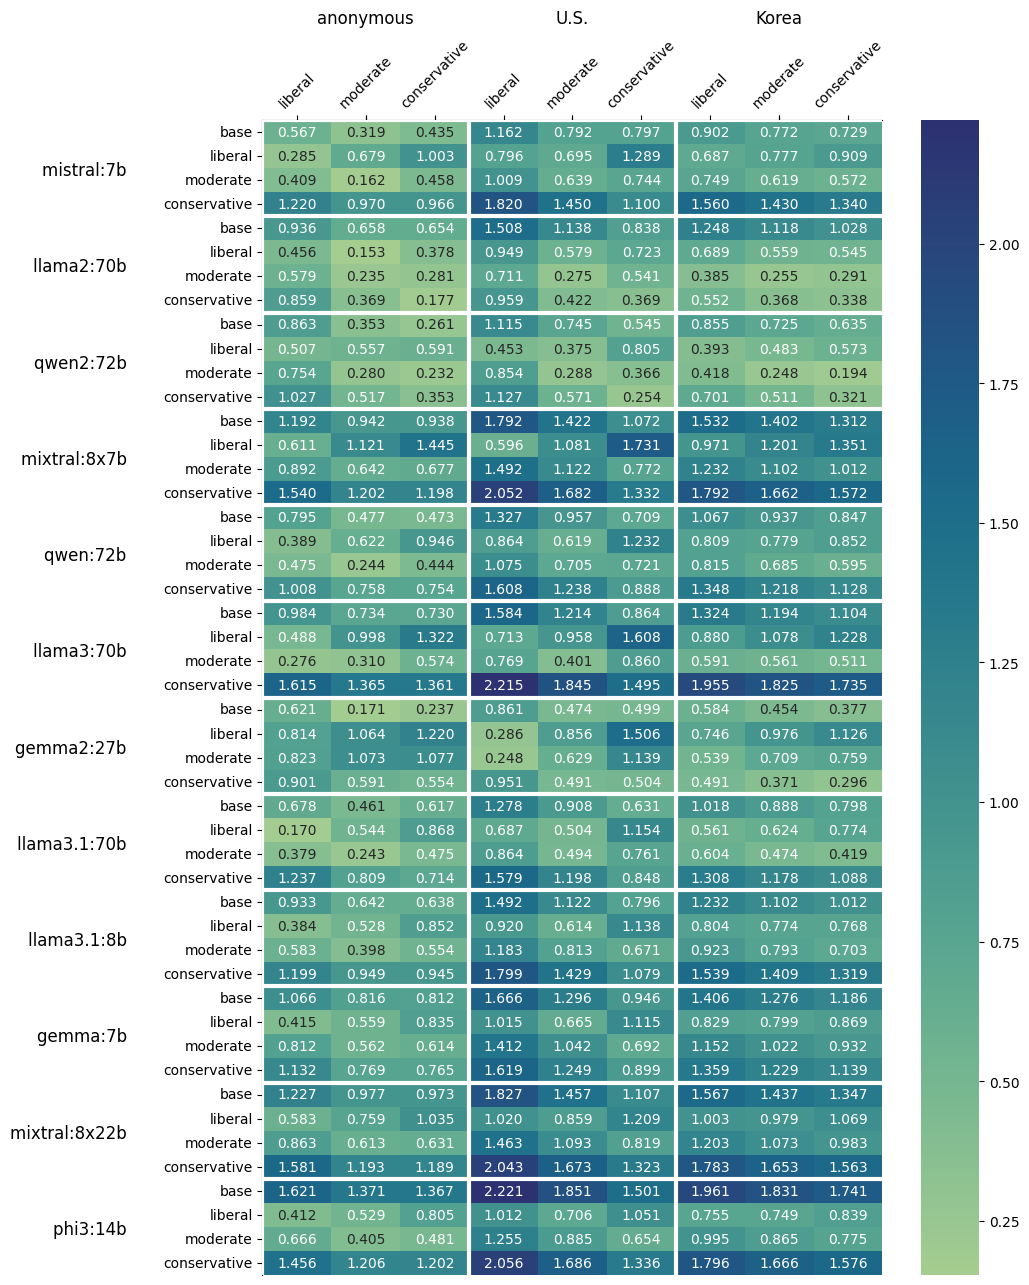

In [9]:
cross_evaluation.plot("./report/heat.cross_evaluation.pdf")